# Ischemic Heart Disease Prevalence In Nigeria Analysis

## Importing of necessary libraries
We start by importing the libraries necessary for manipulating the datasets

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

## Reading necessary csv files 
Using pandas library to read datasets and perfoming EDA 

In [47]:
# Load CSV file
df=pd.read_csv(r'C:\\Users\\fehin\\schlscrape_project\\personal_project\\heart_disease\\analysis\\rough_data\\Ischemic heart disease deaths Nigeria .csv')
df.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Nigeria,Male,15-19 years,Ischemic heart disease,Number,2000,55.800353,85.437303,32.038273
1,Deaths,Nigeria,Female,15-19 years,Ischemic heart disease,Number,2000,66.401507,108.328178,37.301205
2,Deaths,Nigeria,Male,20-24 years,Ischemic heart disease,Number,2000,87.938690,125.094108,52.516620
3,Deaths,Nigeria,Female,20-24 years,Ischemic heart disease,Number,2000,82.082547,129.714427,45.035753
4,Deaths,Nigeria,Male,25-29 years,Ischemic heart disease,Number,2000,72.247637,101.834993,46.453856


In [48]:
df.columns

Index(['measure', 'location', 'sex', 'age', 'cause', 'metric', 'year', 'val',
       'upper', 'lower'],
      dtype='object')

In [49]:
columns=['measure', 'location', 'sex', 'cause', 'metric', 'year']
for column in columns:
    num_unique=df[column].nunique()
    unique=df[column].unique()

    print(f'\n{column} has {num_unique} number of unique values:  {unique} \n ')


measure has 2 number of unique values:  ['Deaths' 'DALYs (Disability-Adjusted Life Years)'] 
 

location has 1 number of unique values:  ['Nigeria'] 
 

sex has 2 number of unique values:  ['Male' 'Female'] 
 

cause has 1 number of unique values:  ['Ischemic heart disease'] 
 

metric has 1 number of unique values:  ['Number'] 
 

year has 22 number of unique values:  [2000 2004 2001 2003 2006 2005 2007 2009 2011 2008 2013 2010 2012 2014
 2016 2015 2018 2019 2017 2021 2002 2020] 
 


In [50]:
df1=df.drop(columns=[ 'location','cause','metric'])
df1.head()

,measure,sex,age,year,val,upper,lower
0,Deaths,Male,15-19 years,2000,55.800353,85.437303,32.038273
1,Deaths,Female,15-19 years,2000,66.401507,108.328178,37.301205
2,Deaths,Male,20-24 years,2000,87.938690,125.094108,52.516620
3,Deaths,Female,20-24 years,2000,82.082547,129.714427,45.035753
4,Deaths,Male,25-29 years,2000,72.247637,101.834993,46.453856


In [51]:
df1.isnull().sum()

measure    0
sex        0
age        0
year       0
val        0
upper      0
lower      0
dtype: int64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   measure  2596 non-null   object 
 1   sex      2596 non-null   object 
 2   age      2596 non-null   object 
 3   year     2596 non-null   int64  
 4   val      2596 non-null   float64
 5   upper    2596 non-null   float64
 6   lower    2596 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 142.1+ KB


In [53]:
df1.shape

(2596, 7)

In [54]:
df1.head()

,measure,sex,age,year,val,upper,lower
0,Deaths,Male,15-19 years,2000,55.800353,85.437303,32.038273
1,Deaths,Female,15-19 years,2000,66.401507,108.328178,37.301205
2,Deaths,Male,20-24 years,2000,87.938690,125.094108,52.516620
3,Deaths,Female,20-24 years,2000,82.082547,129.714427,45.035753
4,Deaths,Male,25-29 years,2000,72.247637,101.834993,46.453856


In [55]:
df1.describe()

,year,val,upper,lower
count,2596.000000,2596.000000,2596.000000,2596.000000
mean,2010.500000,38893.560403,53939.586028,26887.827862
std,6.345511,75928.364149,105743.223487,52287.692848
min,2000.000000,0.000000,0.000000,0.000000
25%,2005.000000,826.779612,1127.774602,568.469429
50%,2010.500000,5198.082442,7209.910439,3486.589906
75%,2016.000000,42402.191962,60224.776712,29407.334588
max,2021.000000,507783.210132,721237.395420,344540.284104


In [56]:
df1=df1.rename(columns={
    'year':'Year',
    'measure':'Measure',
    'age':'Age',
    'val':'No. of deaths',
    'upper':'Upper bound',
    'lower':'Lower Bound'
})
df1.head()

,Measure,sex,Age,Year,No. of deaths,Upper bound,Lower Bound
0,Deaths,Male,15-19 years,2000,55.800353,85.437303,32.038273
1,Deaths,Female,15-19 years,2000,66.401507,108.328178,37.301205
2,Deaths,Male,20-24 years,2000,87.938690,125.094108,52.516620
3,Deaths,Female,20-24 years,2000,82.082547,129.714427,45.035753
4,Deaths,Male,25-29 years,2000,72.247637,101.834993,46.453856


In [57]:
df1['Age']=df1['Age'].str.replace('years',' ')
df1['Age'] = df1['Age'].str.strip()
df1['Age'].head()

0    15-19
1    15-19
2    20-24
3    20-24
4    25-29
Name: Age, dtype: object

In [58]:
df1.nunique()

Measure             2
sex                 2
Age                32
Year               22
No. of deaths    2289
Upper bound      2289
Lower Bound      2289
dtype: int64

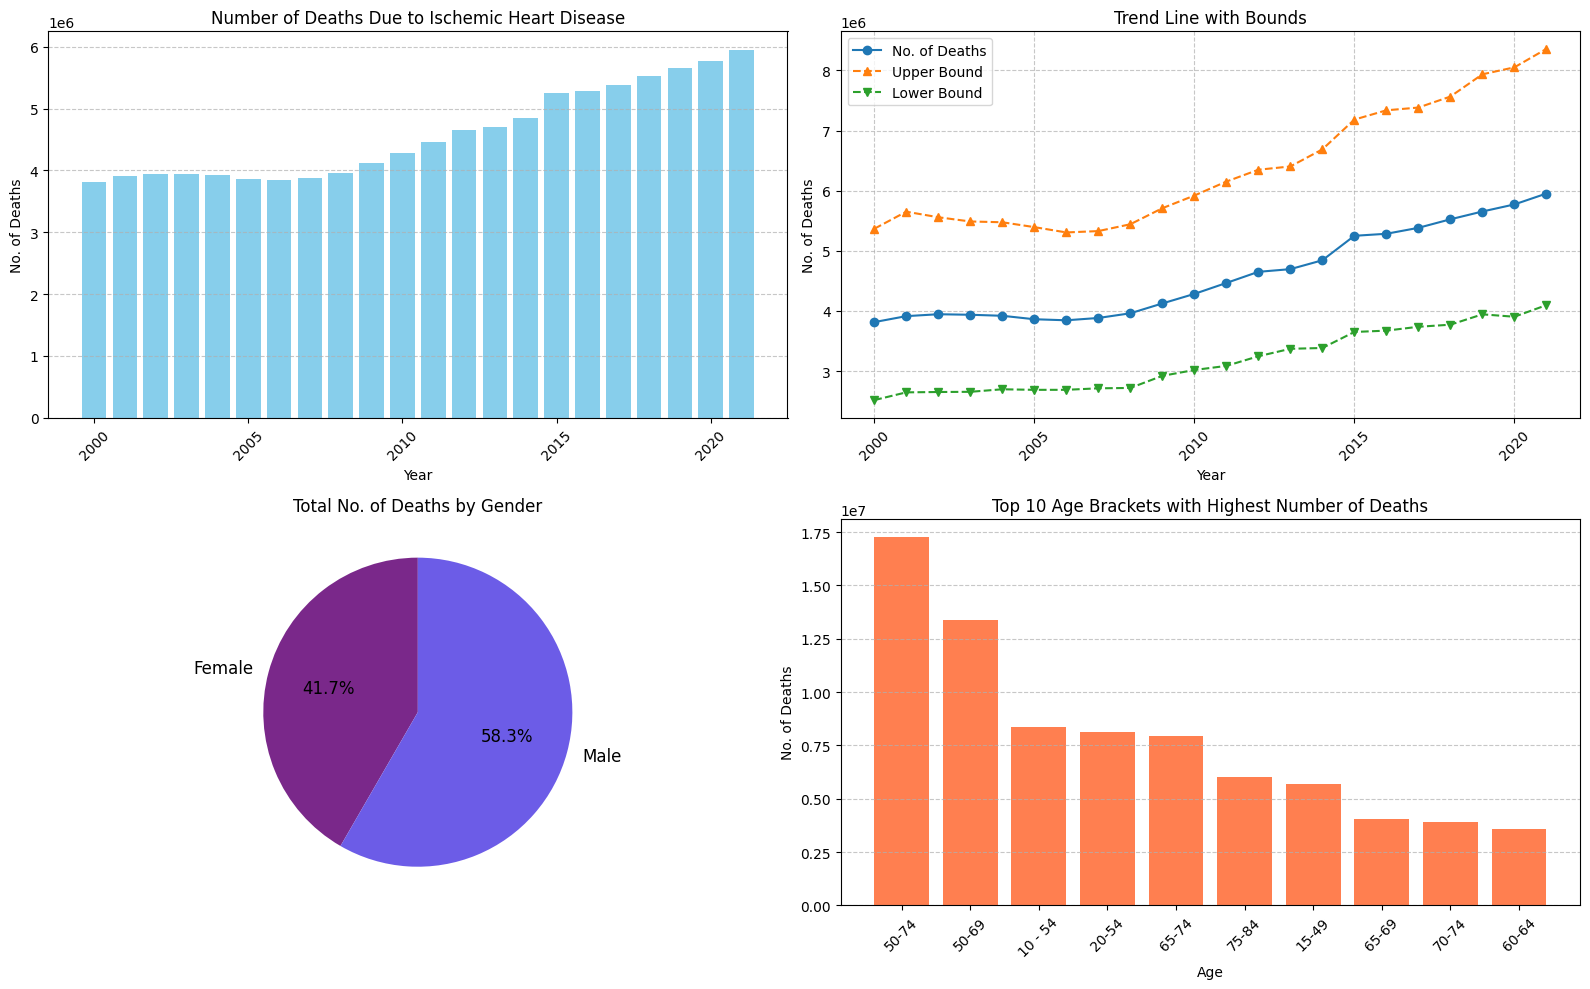

In [59]:
# --- Data Preparation ---

# 1. Deaths per year (Bar Chart)
df1_agg = df1.groupby('Year')['No. of deaths'].sum().reset_index()

# 2. Trend line with bounds (Line Chart)
df1_agg_B = df1.groupby('Year')[['No. of deaths', 'Upper bound', 'Lower Bound']].sum().reset_index()

# 3. Deaths by gender (Pie Chart)
df1_C_agg = df1.groupby('sex')['No. of deaths'].sum().reset_index()

# 4. Top 10 age brackets (Bar Chart)
age_top_10 = df1.groupby('Age')['No. of deaths'].sum().sort_values(ascending=False).head(10)

# --- Plotting ---

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2x2 grid

# 1. Bar Chart - Deaths per year
axs[0, 0].bar(df1_agg['Year'], df1_agg['No. of deaths'], color='skyblue')
axs[0, 0].set_title('Number of Deaths Due to Ischemic Heart Disease')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('No. of Deaths')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Line Chart - Trend with bounds
axs[0, 1].plot(df1_agg_B['Year'], df1_agg_B['No. of deaths'], label='No. of Deaths', marker='o')
axs[0, 1].plot(df1_agg_B['Year'], df1_agg_B['Upper bound'], label='Upper Bound', linestyle='--', marker='^')
axs[0, 1].plot(df1_agg_B['Year'], df1_agg_B['Lower Bound'], label='Lower Bound', linestyle='--', marker='v')
axs[0, 1].set_title('Trend Line with Bounds')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('No. of Deaths')
axs[0, 1].legend()
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

# 3. Pie Chart - Deaths by Gender
axs[1, 0].pie(df1_C_agg['No. of deaths'], labels=df1_C_agg['sex'], colors=['#7A288A', '#6c5ce7'],
              autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
axs[1, 0].set_title('Total No. of Deaths by Gender')

# 4. Bar Chart - Top 10 Age Brackets
axs[1, 1].bar(age_top_10.index.astype(str), age_top_10.values, color='coral')
axs[1, 1].set_title('Top 10 Age Brackets with Highest Number of Deaths')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('No. of Deaths')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout optimization
plt.tight_layout()
plt.show()


In [60]:
df2=pd.read_csv(r'C:\\Users\\fehin\\schlscrape_project\\personal_project\\heart_disease\\analysis\\rough_data\\2021_death_causes_stat.csv')
df2.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_GHECAUSE_TITLE,DIM_SEX_CODE,VAL_DTHS_RATE100K_NUMERIC
0,AFG,2021,Syphilis,BTSX,1.46
1,AFG,2021,Genital herpes,BTSX,0.00
2,AFG,2021,Diphtheria,BTSX,0.11
3,AFG,2021,African trypanosomiasis,BTSX,0.00
4,AFG,2021,Dengue,BTSX,0.00


In [61]:
df2_=df2[df2['DIM_COUNTRY_CODE']=='NGA'].reset_index(drop=True)
df2_.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_GHECAUSE_TITLE,DIM_SEX_CODE,VAL_DTHS_RATE100K_NUMERIC
0,NGA,2021,Gonorrhoea,BTSX,0.01
1,NGA,2021,Tetanus,BTSX,1.12
2,NGA,2021,African trypanosomiasis,BTSX,0.00
3,NGA,2021,Schistosomiasis,BTSX,0.73
4,NGA,2021,Cysticercosis,BTSX,0.16


In [62]:
df2_.drop(columns=['DIM_COUNTRY_CODE','DIM_SEX_CODE'], inplace=True)
df2_.head()

,DIM_YEAR_CODE,DIM_GHECAUSE_TITLE,VAL_DTHS_RATE100K_NUMERIC
0,2021,Gonorrhoea,0.01
1,2021,Tetanus,1.12
2,2021,African trypanosomiasis,0.00
3,2021,Schistosomiasis,0.73
4,2021,Cysticercosis,0.16


In [63]:
df2_=df2_.rename(columns={'DIM_YEAR_CODE':'Year','DIM_GHECAUSE_TITLE':'Death_cause','VAL_DTHS_RATE100K_NUMERIC':'Deaths per 100,000'})
df2_.head()

,Year,Death_cause,"Deaths per 100,000"
0,2021,Gonorrhoea,0.01
1,2021,Tetanus,1.12
2,2021,African trypanosomiasis,0.00
3,2021,Schistosomiasis,0.73
4,2021,Cysticercosis,0.16


In [64]:
df2_sorted=df2_.sort_values(by='Deaths per 100,000',ascending=False).head(10)
df2_sorted

,Year,Death_cause,"Deaths per 100,000"
121,2021,Lower respiratory infections,89.66
51,2021,Malaria,84.17
36,2021,Diarrhoeal diseases,69.91
116,2021,Tuberculosis,57.68
14,2021,Ischaemic heart disease,33.85
74,2021,Birth asphyxia and birth trauma,33.70
82,2021,Stroke,33.34
8,2021,Preterm birth complications,24.01
73,2021,Maternal conditions,22.51
100,2021,HIV/AIDS,19.88


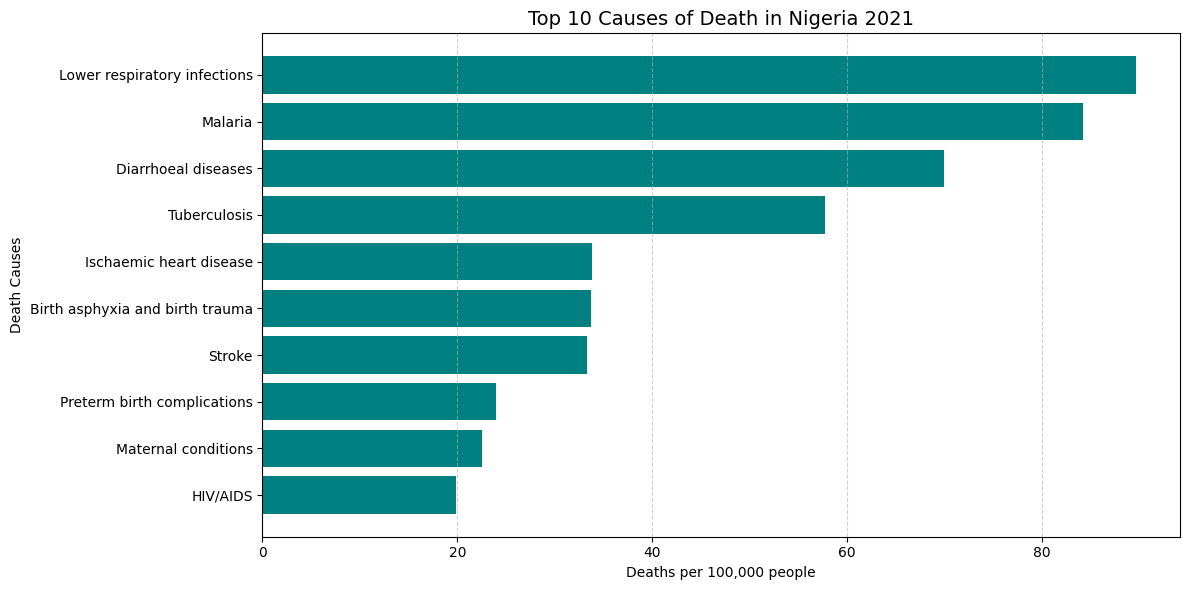

In [65]:
# Plotting
plt.figure(figsize=(12, 6))  # width=900px ~ 12", height=500px ~ 6"
plt.barh(df2_sorted['Death_cause'], df2_sorted['Deaths per 100,000'], color='teal')

# Reverse the y-axis to match Plotly's reversed order
plt.gca().invert_yaxis()

# Titles and labels
plt.title('Top 10 Causes of Death in Nigeria 2021', fontsize=14)
plt.xlabel('Deaths per 100,000 people')
plt.ylabel('Death Causes')

# Optional: grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [66]:
#save the file for dashboard upload
df2_sorted.to_csv('cleaned_data_df2.csv',index=False,encoding='utf-8')

In [67]:
df3=pd.read_csv(r'C:\\Users\\fehin\\schlscrape_project\\personal_project\\heart_disease\\analysis\\rough_data\\physicians_per_1000_people_cleaned.csv')
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.218133,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.035,NaN,NaN,NaN,NaN,0.063,...,0.291,0.284,0.245,0.304,0.214,0.254000,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.249438,NaN,NaN,NaN,NaN
4,Angola,AGO,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.067,NaN,NaN,NaN,NaN,0.076,...,NaN,NaN,0.212,0.211,NaN,NaN,NaN,0.244,NaN,NaN


In [68]:
df3_=df3[df3['Country Name']=='Nigeria']
df3_

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
174,Nigeria,NGA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.017,NaN,NaN,NaN,NaN,0.043,...,NaN,0.443,NaN,0.376,0.367,NaN,0.395,0.394,NaN,NaN


In [69]:
df3_.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [70]:
columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023']
for each_column in columns:
    if df3_[each_column].isnull().all():
        df3_.drop(columns=[each_column], inplace=True)
print('All empty columns dropped')

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value

All empty columns dropped


C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\3604389615.py:12: SettingWithCopyWarning:


A value

In [71]:
df3_.drop(columns=['Indicator Code','Country Name','Country Code'], inplace=True)
df3_

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\442315372.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Indicator Name,1960,1965,1970,1975,1980,1982,1985,1986,1989,...,2007,2008,2009,2013,2016,2018,2019,2021,2022,Unnamed: 68
174,"Physicians (per 1,000 people)",0.017,0.043,0.05,0.049,0.113,0.149,0.192,0.187,0.192,...,0.373,0.371,0.373,0.376,0.443,0.376,0.367,0.395,0.394,NaN


In [72]:
df3_=df3_.set_index('Indicator Name')
df3_=df3_.transpose().reset_index()

df3_=df3_.rename(columns={
    'index':'Year',
    'Physicians (per 1,000 people)': 'No. of physicians (per 1,000 people)'
})
df3_

Indicator Name,Year,"No. of physicians (per 1,000 people)"
0,1960,0.017
1,1965,0.043
2,1970,0.050
3,1975,0.049
4,1980,0.113
5,1982,0.149
6,1985,0.192
7,1986,0.187
8,1989,0.192
9,1992,0.185


In [73]:
print(df3_.columns.tolist())
df3_ = df3_[pd.to_numeric(df3_['Year'], errors='coerce').notna()]
df3_

['Year', 'No. of physicians (per 1,000 people)']


Indicator Name,Year,"No. of physicians (per 1,000 people)"
0,1960,0.017
1,1965,0.043
2,1970,0.050
3,1975,0.049
4,1980,0.113
5,1982,0.149
6,1985,0.192
7,1986,0.187
8,1989,0.192
9,1992,0.185


In [74]:
df3_['People per doctor'] = round(1000 / df3_['No. of physicians (per 1,000 people)'],2)
df3_.head()

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\821408949.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Indicator Name,Year,"No. of physicians (per 1,000 people)",People per doctor
0,1960,0.017,58823.53
1,1965,0.043,23255.81
2,1970,0.050,20000.00
3,1975,0.049,20408.16
4,1980,0.113,8849.56


In [75]:
df3_.drop(columns=['No. of physicians (per 1,000 people)'], inplace=True)
df3_.head()

C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\2175900313.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Indicator Name,Year,People per doctor
0,1960,58823.53
1,1965,23255.81
2,1970,20000.00
3,1975,20408.16
4,1980,8849.56


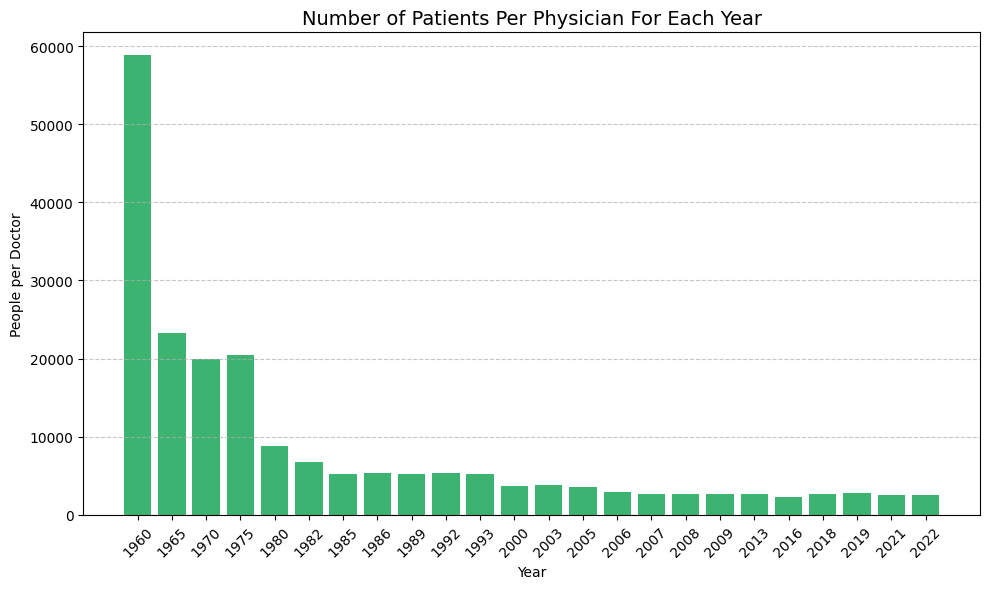

In [76]:
# Create the bar chart
plt.figure(figsize=(10, 6))  # width=800px ≈ 10 inches
plt.bar(df3_['Year'], df3_['People per doctor'], color='mediumseagreen')

# Add titles and labels
plt.title('Number of Patients Per Physician For Each Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('People per Doctor')

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
#save the file for dashboard upload
df3_.to_csv('cleaned_data_df3.csv',index=False,encoding='utf-8')

In [78]:
df4=pd.read_csv(r'C:\\Users\\fehin\\schlscrape_project\\personal_project\\heart_disease\\analysis\\rough_data\\Health_Expenditure_Per_Capita.csv')
df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,93.889833,88.835308,93.106458,93.222292,90.334281,81.969193,93.053627,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,60.058540,61.486458,66.909218,71.334305,74.234108,80.288055,81.319763,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,71.938048,62.715816,60.835189,59.561036,61.997588,64.798255,73.120225,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,107.643562,94.106155,112.851471,83.899200,64.657791,55.051022,64.163422,NaN,NaN,NaN


In [79]:
df4.shape

(266, 69)

In [80]:
df4_=df4[df4['Country Name']=='Nigeria']
df4_

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
174,Nigeria,NGA,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,96.283287,78.236023,72.774307,65.702721,69.68148,69.761848,83.840614,NaN,NaN,NaN


In [81]:
df4_.drop(columns=['Country Name','Country Code','Indicator Code'], inplace=True)
df4_


C:\Users\fehin\AppData\Local\Temp\ipykernel_6632\1496845730.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
174,Current health expenditure per capita (current...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.283287,78.236023,72.774307,65.702721,69.68148,69.761848,83.840614,NaN,NaN,NaN


In [82]:
df4_ = df4_.dropna(axis=1, how='any')
print('Columns with any NaN values dropped')
df4_

Columns with any NaN values dropped


,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
174,Current health expenditure per capita (current...,17.651987,18.488718,18.063854,39.077244,44.164352,53.92662,65.723785,69.150391,80.099861,...,91.060478,100.817009,106.119644,96.283287,78.236023,72.774307,65.702721,69.68148,69.761848,83.840614


In [83]:
df4_=df4_.set_index('Indicator Name').transpose().reset_index()
df4_

Indicator Name,index,Current health expenditure per capita (current US$)
0,2000,17.651987
1,2001,18.488718
2,2002,18.063854
3,2003,39.077244
4,2004,44.164352
5,2005,53.926620
6,2006,65.723785
7,2007,69.150391
8,2008,80.099861
9,2009,68.006859


In [84]:
df4_=df4_.rename(columns={
    'index': 'Year',
    'Current health expenditure per capita (current US$)':'Health expenditure per capita (US$)'
})
df4_.head()

Indicator Name,Year,Health expenditure per capita (US$)
0,2000,17.651987
1,2001,18.488718
2,2002,18.063854
3,2003,39.077244
4,2004,44.164352


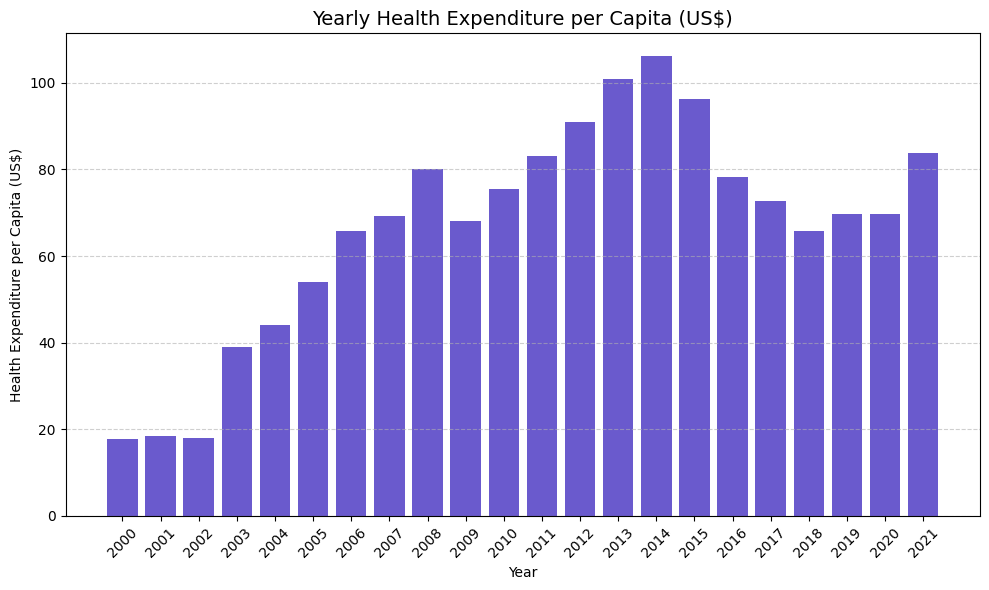

In [85]:
plt.figure(figsize=(10, 6))  # width=800px ≈ 10 inches
plt.bar(df4_['Year'], df4_['Health expenditure per capita (US$)'], color='slateblue')

# Titles and labels
plt.title('Yearly Health Expenditure per Capita (US$)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Health Expenditure per Capita (US$)')

# Improve layout
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [86]:
#save the file for dashboard upload
df4_.to_csv('cleaned_data_df4.csv',index=False,encoding='utf-8')